In [345]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [346]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [348]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [349]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [350]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [351]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [352]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [353]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
train_data = train_data.drop(columns=["PassengerId"])

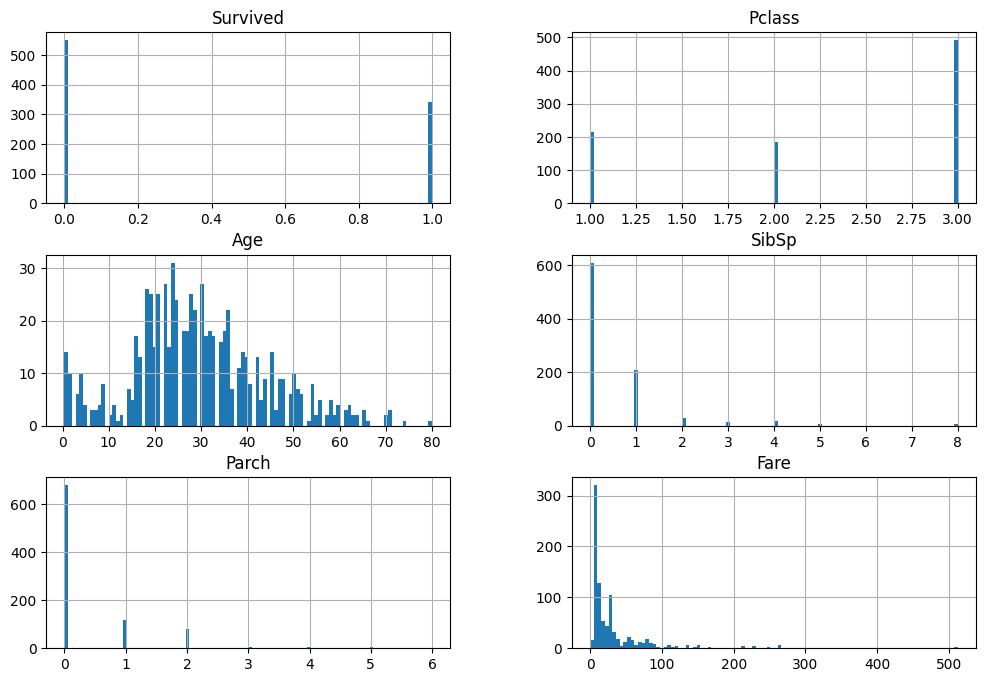

In [355]:
train_data.hist(bins = 100, figsize=(12, 8))
plt.show()

Age and Fare are not bell shaped normal distribution, therefore need to be transformed later

In [356]:
corr_matrix = train_data.corr()

In [357]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

Fare and Pclass seems to be highly correlated to Survived

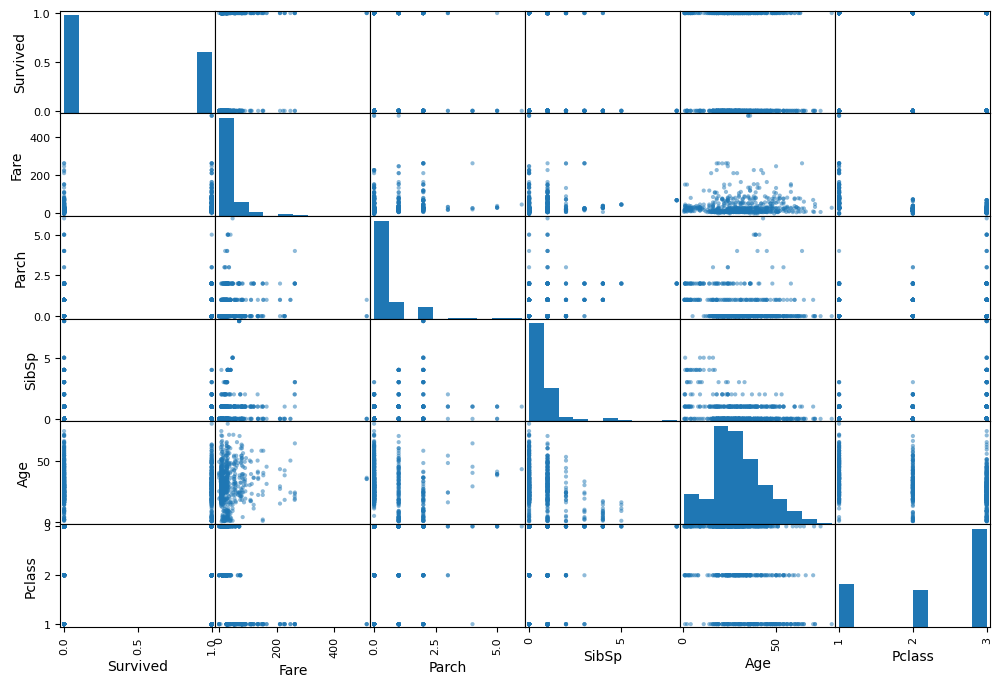

In [358]:
attributes = ["Survived", "Fare", "Parch", "SibSp", "Age", "Pclass"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
plt.show()

One hot encode Pclass:

In [359]:
Pclass_cat = train_data[["Pclass"]]
Pclass_cat.head(8)

,Pclass
0,3
1,1
2,3
3,1
4,3
5,3
6,1
7,3


In [360]:
cat_encoder = OneHotEncoder()
Pclass_cat_1hot = cat_encoder.fit_transform(Pclass_cat)

In [361]:
Pclass_cat_1hot

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [362]:
Pclass_cat_1hot = Pclass_cat_1hot.toarray()

In [363]:
Pclass_cat_1hot = Pclass_cat_1hot.astype(int)

In [364]:
Pclass_cat_1hot

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [365]:
cat_encoder.feature_names_in_

array(['Pclass'], dtype=object)

In [366]:
cat_encoder.get_feature_names_out()

array(['Pclass_1', 'Pclass_2', 'Pclass_3'], dtype=object)

In [367]:
Pclass_cat_1hot_df = pd.DataFrame(Pclass_cat_1hot, columns = cat_encoder.get_feature_names_out())

In [368]:
Pclass_cat_1hot_df

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [369]:
train_data = train_data.drop(columns=["Pclass"])

In [370]:
train_data = pd.concat([train_data, Pclass_cat_1hot_df], axis=1)

In [371]:
train_data

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


Feature scaling on Fare and Age:

In [372]:
train_data[["Fare"]]
print(train_data[["Fare"]].max())
print(train_data[["Fare"]].min())
print(train_data[["Fare"]].isnull().sum())

Fare    512.3292
dtype: float64
Fare    0.0
dtype: float64
Fare    0
dtype: int64


Try log scaling on Fare:

In [373]:
train_data[["Fare"]] = train_data[["Fare"]].apply(np.log)

In [374]:
train_data[["Fare"]]

,Fare
0,1.981001
1,4.266662
2,2.070022
3,3.972177
4,2.085672
...,...
886,2.564949
887,3.401197
888,3.154870
889,3.401197


In [375]:
print(train_data[["Fare"]].max())
print(train_data[["Fare"]].min())
print(train_data[["Fare"]].isnull().sum())

Fare    6.238967
dtype: float64
Fare   -inf
dtype: float64
Fare    0
dtype: int64


In [376]:
count = (train_data[["Fare"]] == -np.inf).sum()
count

Fare    15
dtype: int64

In [377]:
train_data[["Fare"]] = train_data[["Fare"]].replace(-np.inf, 0.0)

In [378]:
train_data[["Fare"]].min()

Fare    0.0
dtype: float64

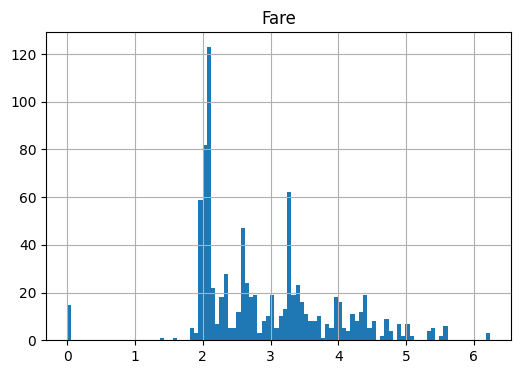

In [379]:
train_data[["Fare"]].hist(bins = 100, figsize=(6, 4))
plt.show()

In [384]:
train_data

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,1.981001,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,4.266662,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,2.070022,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,3.972177,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,0.365167,0,0,373450,2.085672,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,-0.185937,0,0,211536,2.564949,NaN,S,0,1,0
887,1,"Graham, Miss. Margaret Edith",female,-0.737041,0,0,112053,3.401197,B42,S,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,0,0,1
889,1,"Behr, Mr. Karl Howell",male,-0.254825,0,0,111369,3.401197,C148,C,1,0,0
